Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Import dataset

In [ ]:
data=pd.read_csv('/content/Suicides in India 2001-2012.csv')
data.shape

(237519, 7)

In [ ]:
data.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [ ]:
data.fillna(999, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   State      237519 non-null  int64
 1   Year       237519 non-null  int64
 2   Type_code  237519 non-null  int64
 3   Type       237519 non-null  int64
 4   Gender     237519 non-null  int64
 5   Age_group  237519 non-null  int64
 6   Total      237519 non-null  int64
dtypes: int64(7)
memory usage: 12.7 MB


In [ ]:
data.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


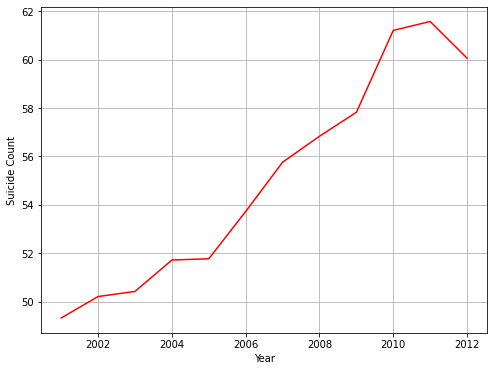

In [ ]:
data1 = data.groupby('Year')
plt.figure(figsize=(8,6))
ap = sns.lineplot(data = data1.mean()['Total'], markers= True,color = "red")
plt.xlabel('Year')
plt.ylabel('Suicide Count')
plt.grid()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


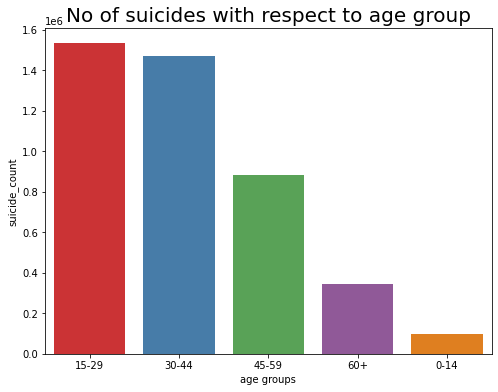

In [ ]:
age_group = data[data.Age_group != '0-100+']
age_group= pd.DataFrame(age_group.groupby(['Age_group'])['Total'].sum().reset_index())
age_group.sort_values(by = ['Total'], ascending = False, inplace = True)
plt.figure(figsize=(8,6))
sns.barplot(age_group['Age_group'], y = age_group['Total'], data = age_group, palette = 'Set1')
plt.title('No of suicides with respect to age group', fontsize = 20)
plt.xlabel('age groups')
plt.ylabel('suicide_count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


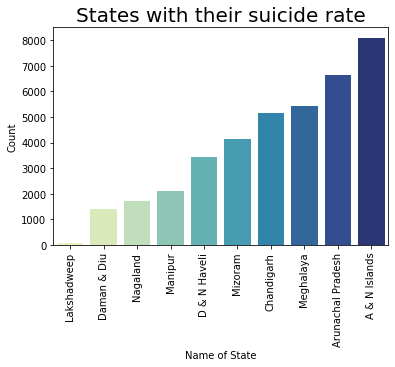

In [ ]:
df_state = pd.DataFrame(data.groupby(['State'])['Total'].sum().reset_index())
df_state.sort_values(by = ['Total'], ascending = True, inplace = True)
sns.barplot(df_state['State'].head(10), y = df_state['Total'].head(10), data = df_state, palette = "YlGnBu")
plt.title('States with their suicide rate', fontsize = 20)
plt.xlabel('Name of State')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


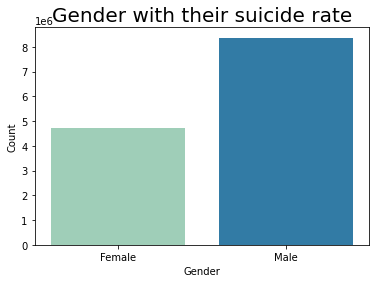

In [ ]:
df_Gender = pd.DataFrame(data.groupby(['Gender'])['Total'].sum().reset_index())
df_Gender.sort_values(by = ['Total'], ascending = True, inplace = True)
sns.barplot(df_Gender['Gender'], y = df_Gender['Total'], data = df_Gender, palette = "YlGnBu")
plt.title('Gender with their suicide rate', fontsize = 20)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
df_education = data[data.Type_code == 'Education_Status']

In [ ]:
df_education

,State,Year,Type_code,Type,Gender,Age_group,Total
260,A & N Islands,2001,Education_Status,Diploma,Female,0-100+,0
261,A & N Islands,2001,Education_Status,No Education,Female,0-100+,4
262,A & N Islands,2001,Education_Status,Post Graduate and Above,Female,0-100+,0
263,A & N Islands,2001,Education_Status,Middle,Female,0-100+,33
264,A & N Islands,2001,Education_Status,Graduate,Female,0-100+,0
...,...,...,...,...,...,...,...
237234,West Bengal,2012,Education_Status,Primary,Male,0-100+,2983
237235,West Bengal,2012,Education_Status,No Education,Male,0-100+,1096
237236,West Bengal,2012,Education_Status,Middle,Male,0-100+,2467
237237,West Bengal,2012,Education_Status,Graduate,Male,0-100+,242


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


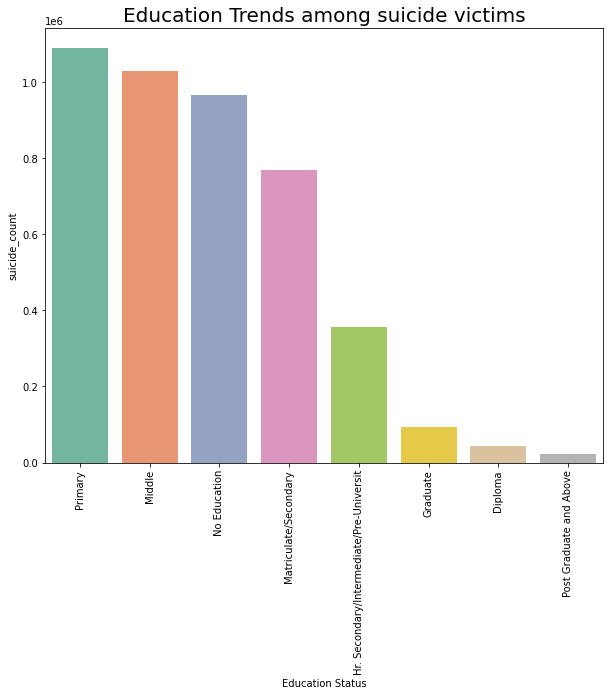

In [ ]:
df_education2= pd.DataFrame(df_education.groupby(['Type'])['Total'].sum().reset_index())
df_education2.sort_values(by = ['Total'], ascending = False, inplace = True)
plt.figure(figsize=(10,8))
sns.barplot(df_education2['Type'], y = df_education2['Total'], data = df_education2, palette = 'Set2')
plt.title('Education Trends among suicide victims', fontsize = 20)
plt.xlabel('Education Status')
plt.xticks(rotation =90)
plt.ylabel('suicide_count')
plt.show()

Encoding categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Age_group'] = le.fit_transform(data['Age_group'])
data['Type'] = le.fit_transform(data['Type'])
data['Type_code'] = le.fit_transform(data['Type_code'])
data['State'] = le.fit_transform(data['State'])

In [ ]:
x=data.drop(['Total'], axis = 1)
y=data['Total']

print(x.shape)
print(y.shape)

(237519, 6)
(237519,)


Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(178139, 6)
(178139,)
(59380, 6)
(59380,)


Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

Storing results

In [ ]:
ML_Model = []
mse_test = []
mae_test = []
rmse_test = []
r2_test = []

def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    mae_test.append(round(a, 3))
    mse_test.append(round(b, 3))
    rmse_test.append(round(c, 3))
    r2_test.append(round(d, 3))

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Performance Measures for linear Regression

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))
print('Root Mean Square Error : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score : ",r2_score(y_test,y_pred))

Mean Absolute Error :  115.23910126095674
Mean Squared Error :  543503.9845864476
Root Mean Square Error :  737.2272272416745
R2 score :  0.012351316781467614


In [ ]:
storeResults('Linear Regression',mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)),r2_score(y_test,y_pred))

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

Accuracy

In [ ]:
acc_train_forest =  model1.score(x_train, y_train)
acc_test_forest =  model1.score(x_test, y_test)
print(acc_train_forest)
print(acc_test_forest)


0.9996784030831165
0.9980893170897632


Performance Measures for random forest regressor

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))
print('Root Mean Square Error : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score : ",r2_score(y_test,y_pred))

Mean Absolute Error :  7.015797736343127
Mean Squared Error :  1051.4505741158875
Root Mean Square Error :  32.42607861144926
R2 score :  0.9980893170897632


In [ ]:
storeResults('Random Forest Regressor',mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)),r2_score(y_test,y_pred))

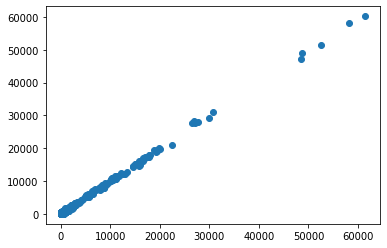

In [ ]:
plt.scatter(y_test, y_pred)

Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4,include_bias=False)
x_train_trans=poly_reg.fit_transform(x_train)
x_test_trans=poly_reg.fit_transform(x_test)

In [ ]:
lin_reg_2=LinearRegression()
lin_reg_2.fit(x_train_trans,y_train)

LinearRegression()

In [ ]:
y_pred=lin_reg_2.predict(x_test_trans)
y_pred

array([   7.7436195 ,  316.411017  ,   34.50719969, ...,   44.48959772,
       1040.69522917,   26.11513444])

Performance Measures for Polynomial Regresssion

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))
print('Root Mean Square Error : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score : ",r2_score(y_test,y_pred))

Mean Absolute Error :  119.31914301452927
Mean Squared Error :  491587.1283917801
Root Mean Square Error :  701.132746626329
R2 score :  0.10669398235828931


In [ ]:
storeResults('Polynomial Regression',mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred),np.sqrt(mean_squared_error(y_test,y_pred)),r2_score(y_test,y_pred))

Decison Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(x_train,y_train)
y_pred_test=regressor.predict(x_test)
y_pred_train=regressor.predict(x_train)

Score

In [ ]:
acc_train_tree = regressor.score(x_train, y_train)
acc_test_tree = regressor.score(x_test, y_test)
print(acc_train_tree)
print(acc_test_tree)

0.999898049433034
0.9975491560838836


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred_test))
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred_test))
print('Root Mean Square Error : ',np.sqrt(mean_squared_error(y_test,y_pred_test)))
print("R2 score : ",r2_score(y_test,y_pred_test))

Mean Absolute Error :  7.816958571909734
Mean Squared Error :  1348.7016756483665
Root Mean Square Error :  36.724673935221894
R2 score :  0.9975491560838836


In [ ]:
storeResults('Decision tree regressor',mean_absolute_error(y_test,y_pred_test),mean_squared_error(y_test,y_pred_test),np.sqrt(mean_squared_error(y_test,y_pred_test)),r2_score(y_test,y_pred_test))

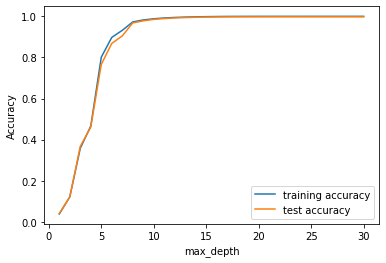

In [ ]:
training_accuracy = []
test_accuracy = []
depth = range(1, 31)
for n in depth:
    tree = DecisionTreeRegressor(max_depth=n)
    tree.fit(x_train, y_train)
    training_accuracy.append(tree.score(x_train, y_train))
    test_accuracy.append(tree.score(x_test, y_test))

plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

Comparing the models

In [ ]:
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Mean Absolute Error ': mae_test,
    'Mean Squared Error': mse_test,
    'Root Mean Square Error': rmse_test,
    'R2 score': r2_test})
results

,ML Model,Mean Absolute Error,Mean Squared Error,Root Mean Square Error,R2 score
0,Linear Regression,115.239,543503.985,737.227,0.012
1,Random Forest Regressor,7.016,1051.451,32.426,0.998
2,Polynomial Regression,119.319,491587.128,701.133,0.107
3,Decision tree regressor,7.817,1348.702,36.725,0.998
